# Dev set

In [28]:
from load_data_fns import LOAD_DATA_FNS, DatasetName, TextType

# from torch.utils.data import DataLoader
from transformers import RobertaTokenizer
from toolkit.nlp import TextDataset
from toolkit.nlp import NLPTrainingConfig
from toolkit.enums import Split

model_path = "outputs/QQP/roberta-base/ORI/all/baseline_val_all/5/32/2e-05/5/optimal_checkpoint"
model_type = model_path.split("/")[2]
# data_file_path = 'data/QQP/validation/vicuna/Rephrase_the_following_question_and_keep_the_meaning_the_same:/all.jsonl'
config = NLPTrainingConfig.load(model_path)
tokenizer = RobertaTokenizer.from_pretrained(config.model_dir)
# dataset = TextDataset(data_file_path, model_type, tokenizer, LOAD_DATA_FNS[DatasetName.QQP], text_type=TextType.DATA_AUG_REP4)
dataset = TextDataset.from_file(
    config.val_file_path,
    tokenizer,
    split=Split.VALIDATION,
    configs=config,
    load_data_fn=LOAD_DATA_FNS[DatasetName[config.dataset_name]],
    text_type=TextType[config.text_type],
)
dataset.report()

2023-08-24 18:40:19,034 <INFO> Configuration: 👻 Custom attributes:
2023-08-24 18:40:19,035 <INFO> Configuration:    text_type=ORI
2023-08-24 18:40:19,036 <INFO> Configuration:    part=all
2023-08-24 18:40:19,037 <INFO> Configuration:    min_threshold=True
2023-08-24 18:40:19,687 <DEBUG> TextDataset: ⏳ Loading VALIDATION dataset ...
2023-08-24 18:40:19,688 <DEBUG> TextDataset: 💿 Loading dataset from cache ...
2023-08-24 18:40:20,114 <DEBUG> TextDataset: ✔️  Load successfully.
2023-08-24 18:40:20,114 <DEBUG> TextDataset: ⌛ Loading VALIDATION data takes 0.43 sec.
2023-08-24 18:40:20,115 <INFO> TextDataset: Total data: 40430
2023-08-24 18:40:20,116 <INFO> TextDataset: Max length of input: 191
2023-08-24 18:40:20,116 <INFO> TextDataset: Max length of label: 1
2023-08-24 18:40:20,117 <INFO> TextDataset: Total data: 40430
2023-08-24 18:40:20,118 <INFO> TextDataset: Max length of input: 191
2023-08-24 18:40:20,118 <INFO> TextDataset: Max length of label: 1


In [29]:
from toolkit.training import Trainer
from model.MatchModel_binary_classification import RobertaModel_binary_classify

from toolkit.enums import Split
from utils.evaluate import calculate_metric_callback


model = RobertaModel_binary_classify.from_pretrained(model_path)
config.batch_size_infer = 64

trainer = Trainer(
    "classify",
    evaluate_only=True,
    config=config,
    model=model,
    tokenizer=tokenizer,
    dataset_val=dataset,
    calculate_metric_callback=lambda x, y, z: calculate_metric_callback(x, y, z, DatasetName[config.dataset_name], TextType[config.text_type], dataset),
)
metric_dict, *a, all_logits, all_labels = trainer.evaluate(Split.VALIDATION, cuda_id=0)
print(metric_dict)

VALIDATION:   0%|          | 0/632 [00:00<?, ?batch/s]

{'Accuracy': 91.70665347514222, 'F1-score': 88.93070549007956, 'Loss': 0.27683316560350124}


In [30]:
import torch
import numpy as np

all_prob = torch.sigmoid(torch.tensor(all_logits)).numpy()

In [31]:
%load_ext autoreload
%autoreload 2

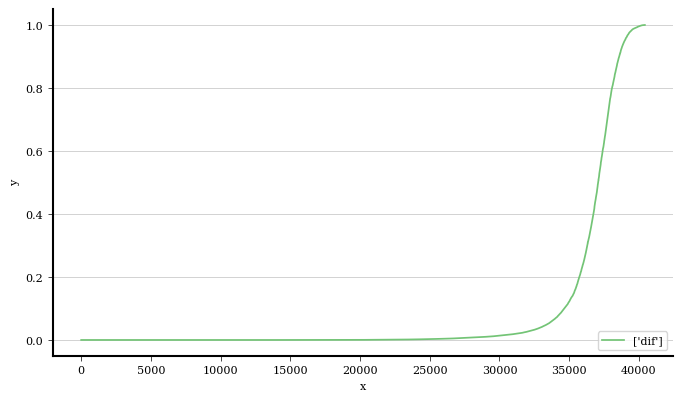

In [32]:
from toolkit.chart import LineChart


chart = LineChart()
chart.draw(np.array(range(len(all_prob))).reshape(1,1,1,-1), np.sort(np.abs(all_prob-all_labels), axis=0).reshape(1,1,1,-1), np.array('dif').reshape(1,1,1,-1))
chart.show()

# Training set

In [33]:
from load_data_fns import LOAD_DATA_FNS, DatasetName, TextType

# from torch.utils.data import DataLoader
from transformers import RobertaTokenizer
from toolkit.nlp import TextDataset
from toolkit.nlp import NLPTrainingConfig
from toolkit.enums import Split

model_path = "outputs/QQP/roberta-base/ORI/all/baseline_val_all/3/16/2e-05/5/optimal_checkpoint"
model_type = model_path.split("/")[2]
# data_file_path = 'data/QQP/validation/vicuna/Rephrase_the_following_question_and_keep_the_meaning_the_same:/all.jsonl'
config = NLPTrainingConfig.load(model_path)
tokenizer = RobertaTokenizer.from_pretrained(config.model_dir)
# dataset = TextDataset(data_file_path, model_type, tokenizer, LOAD_DATA_FNS[DatasetName.QQP], text_type=TextType.DATA_AUG_REP4)
dataset = TextDataset.from_file(
    config.train_file_path,
    tokenizer,
    split=Split.TRAINING,
    configs=config,
    load_data_fn=LOAD_DATA_FNS[DatasetName[config.dataset_name]],
    text_type=TextType[config.text_type],
)
dataset.report()

2023-08-24 18:41:18,464 <INFO> Configuration: 👻 Custom attributes:
2023-08-24 18:41:18,465 <INFO> Configuration:    text_type=ORI
2023-08-24 18:41:18,466 <INFO> Configuration:    part=all
2023-08-24 18:41:18,467 <INFO> Configuration:    min_threshold=True


2023-08-24 18:41:18,547 <DEBUG> TextDataset: ⏳ Loading TRAINING dataset ...
2023-08-24 18:41:18,548 <DEBUG> TextDataset: 💿 Loading dataset from cache ...
2023-08-24 18:41:23,109 <DEBUG> TextDataset: ✔️  Load successfully.
2023-08-24 18:41:23,110 <DEBUG> TextDataset: ⌛ Loading TRAINING data takes 4.56 sec.
2023-08-24 18:41:23,111 <INFO> TextDataset: Total data: 363846
2023-08-24 18:41:23,111 <INFO> TextDataset: Max length of input: 317
2023-08-24 18:41:23,112 <INFO> TextDataset: Max length of label: 1
2023-08-24 18:41:23,113 <INFO> TextDataset: Total data: 363846
2023-08-24 18:41:23,114 <INFO> TextDataset: Max length of input: 317
2023-08-24 18:41:23,114 <INFO> TextDataset: Max length of label: 1


In [34]:
from toolkit.training import Trainer
from model.MatchModel_binary_classification import RobertaModel_binary_classify

from toolkit.enums import Split
from utils.evaluate import calculate_metric_callback


model = RobertaModel_binary_classify.from_pretrained(model_path)
config.batch_size_infer = 64

trainer = Trainer(
    "classify",
    evaluate_only=True,
    config=config,
    model=model,
    tokenizer=tokenizer,
    dataset_val=dataset,
    calculate_metric_callback=lambda x, y, z: calculate_metric_callback(x, y, z, DatasetName[config.dataset_name], TextType[config.text_type], dataset),
)
metric_dict, *a, all_logits, all_labels = trainer.evaluate(Split.VALIDATION, cuda_id=0)
print(metric_dict)

VALIDATION:   0%|          | 0/5686 [00:00<?, ?batch/s]

{'Accuracy': 96.85196484226843, 'F1-score': 95.82111115975657, 'Loss': 0.08947365722729393}


In [35]:
import torch
import numpy as np

all_prob = torch.sigmoid(torch.tensor(all_logits)).numpy()

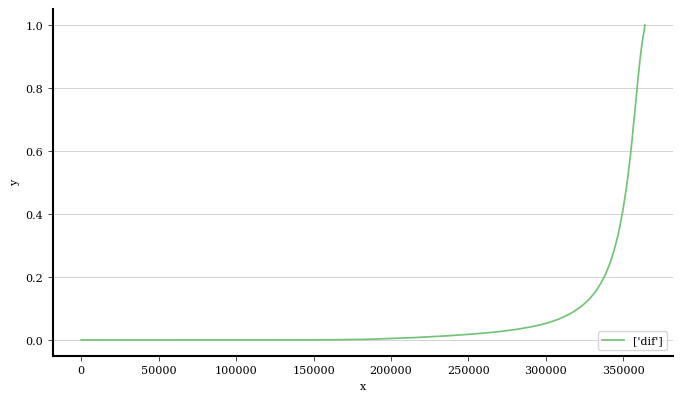

In [36]:
from toolkit.chart import LineChart


chart = LineChart()
chart.draw(np.array(range(len(all_prob))).reshape(1,1,1,-1), np.sort(np.abs(all_prob-all_labels), axis=0).reshape(1,1,1,-1), np.array('dif').reshape(1,1,1,-1))
chart.show()

In [49]:
import pandas as pd
from collections import defaultdict
d = defaultdict(list)

for idx, [prob, label, dif, text_pair] in enumerate(zip(all_prob, all_labels, np.abs(all_prob-all_labels), dataset.splited_texts_input)):
    d['dif'].append(dif.item())
    d['prob'].append(prob.item())
    d['label'].append(label.item())
    d['question1'].append(text_pair[0])
    d['question2'].append(text_pair[1])

df = pd.DataFrame(d)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363846 entries, 0 to 363845
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dif        363846 non-null  float64
 1   prob       363846 non-null  float64
 2   label      363846 non-null  int64  
 3   question1  363846 non-null  object 
 4   question2  363846 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 13.9+ MB


,dif,prob,label,question1,question2
0,0.000321,0.000321,0,How is the life of a math student? Could you d...,Which level of prepration is enough for the ex...
1,0.016740,0.983260,1,How do I control my horny emotions?,How do you control your horniness?
2,0.000492,0.000492,0,What causes stool color to change to yellow?,What can cause stool to come out as little balls?
3,0.041059,0.958941,1,What can one do after MBBS?,What do i do after my MBBS ?
4,0.000320,0.000320,0,Where can I find a power outlet for my laptop ...,"Would a second airport in Sydney, Australia be..."


In [50]:
df_wrong = df[df['dif']>0.5]
df_wrong

,dif,prob,label,question1,question2
35,0.794462,0.794462,0,Has Ancient Sumer been scientifically tested?,Has Ancient History been scientifically tested...
119,0.714769,0.714769,0,What steps should the Indian government take i...,What steps can be taken by Indian Ministry of ...
127,0.679699,0.679699,0,How do I recover my forgotten Gmail password?,How do I recover my Gmail password when I don'...
133,0.624841,0.375159,1,Why should we learn photography?,What is there to learn in photography?
150,0.517398,0.482602,1,What are the best online coding bootcamps?,What is best online coding bootcamp 2016?
...,...,...,...,...,...
363763,0.822053,0.822053,0,How do I prepare for the New SAT?,How do I self study for the new SAT?
363780,0.994756,0.994756,0,What caused the Spanish Civil War?,What was the Spanish Civil War? What caused it?
363786,0.580656,0.419344,1,"To become a real estate developer, do you need...",Should I do civil engineering or master’s degr...
363791,0.932523,0.932523,0,What are aqueducts and who were they invented by?,Who invented aqueducts? How were they invented?


In [ ]:
print(df_wrong[df_wrong['dif']>0.9].to_string(max_rows=None))

In [53]:
sorted_df = df.sort_values('dif', ascending=True)
sorted_df.head()

,dif,prob,label,question1,question2
124645,0.000319,0.000319,0,What are some consumer products that are commo...,Why is India still a developing country?
262631,0.000319,0.000319,0,How can I factory reset my HP laptop without a...,Do I need to register a company?
125428,0.000319,0.000319,0,If Carmelo Anthony is given the team that LeBr...,"If LeBron James, Kyrie Irving, Anthony Bennett..."
127807,0.000319,0.000319,0,Can the new product by Amazon 'Echo' recognize...,"What are the differences between Amazon Echo, ..."
191419,0.000319,0.000319,0,Is taking Remicade infusion to treat ankylosin...,"My beloved girlfriend has a leg disease, the m..."


In [54]:
sorted_df.to_json('data/QQP/train/all_sorted.json')

In [1]:
import pandas as pd

sorted_df = pd.read_json('data/QQP/train/all_sorted.json')
sorted_df = sorted_df.reset_index(drop=True)
sorted_df.info()
sorted_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363846 entries, 0 to 363845
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dif        363846 non-null  float64
 1   prob       363846 non-null  float64
 2   label      363846 non-null  int64  
 3   question1  363846 non-null  object 
 4   question2  363846 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 13.9+ MB


,dif,prob,label,question1,question2
0,0.000319,0.000319,0,What are some consumer products that are commo...,Why is India still a developing country?
1,0.000319,0.000319,0,How can I factory reset my HP laptop without a...,Do I need to register a company?
2,0.000319,0.000319,0,If Carmelo Anthony is given the team that LeBr...,"If LeBron James, Kyrie Irving, Anthony Bennett..."
3,0.000319,0.000319,0,Can the new product by Amazon 'Echo' recognize...,"What are the differences between Amazon Echo, ..."
4,0.000319,0.000319,0,Is taking Remicade infusion to treat ankylosin...,"My beloved girlfriend has a leg disease, the m..."


In [2]:
print(sorted_df['label'].to_list().index(1))
print(sorted_df[sorted_df['dif']>0.5].index[0])

140952
352392


In [23]:
# filtered_df = sorted_df.iloc[sorted_df['label'].to_list().index(1):sorted_df[sorted_df['dif']>0.5].index[0]]
filtered_df = sorted_df.iloc[sorted_df[sorted_df["dif"] > 0.01].index[0] : sorted_df[sorted_df["dif"] > 0.5].index[0]]
filtered_df.info()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128967 entries, 223425 to 352391
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dif        128967 non-null  float64
 1   prob       128967 non-null  float64
 2   label      128967 non-null  int64  
 3   question1  128967 non-null  object 
 4   question2  128967 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.9+ MB


,dif,prob,label,question1,question2
223425,0.010001,0.989999,1,Which US presidents were assassinated and why?,Which US Presidents were assassinated?
223426,0.010001,0.989999,1,What do Chinese people think about the Indians?,What do Chinese people think of Indians?
223427,0.010001,0.989999,1,What are some products made from crude oil?,What are some of the products made from crude ...
223428,0.010002,0.010002,0,How do I start a program while anchoring?,What are tips for anchoring?
223429,0.010002,0.010002,0,Why hasn't PLA attacked Taiwan yet?,Why hasn't China taken the place of the US in ...


In [24]:
filtered_df.value_counts('label')

label
1    90313
0    38654
Name: count, dtype: int64

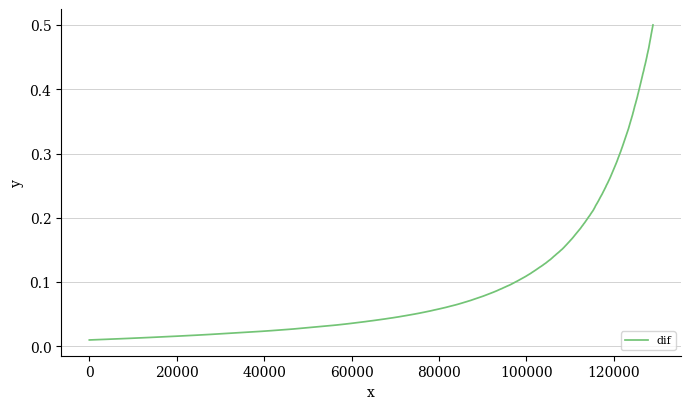

In [25]:
from toolkit.chart import LineChart
import numpy as np
diffs = filtered_df['dif']
chart = LineChart()
chart.draw(np.array(range(len(diffs))).reshape(1,1,1,-1), np.sort(diffs, axis=0).reshape(1,1,1,-1), np.array('dif').reshape(1,1,1,-1))
chart.show()